## Multi Layer Perceptron / DNN Model On Diabeties Data

### Here We evaluation the performances and time complexities of optimizers like BGD , MBGD , SGD

#### Import Basic packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense , BatchNormalization , Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\diabetes.csv')

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


#### Shape 

In [4]:
df.shape

(768, 9)

### Exploratory Data Analysis

#### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Handling missing values

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Describe

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Insights : In describe of features , We noticed there faetures like Glucose  , BloodPressure  , SkinThickness  , Insulin  ,BMI contains min value is 0.0000 . actually this thing is not possible. if any human have glucose zero or BloodPressure zero that human should not survive. so we need to take care of this data .

##### so we will relace this data with median data (for practice only . In real time , we will take help from SME (subject matter expert) or will discuss with client  about data.

### Data Preprocessing

#### use where function for to replace data

In [8]:
for feature in df.iloc[: , 1:6]:
    
    
    df[feature] = np.where(df[feature] == 0 , df[feature].median() , df[feature])

#### Describe after median imputation

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Split the data into independent and dependent variable

In [10]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [11]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31


In [12]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

#### Split the data into train and test

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 20 , stratify = y)

In [14]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(614, 8) (154, 8) (614,) (154,)


#### Feature Scaling

In [15]:
scaler = StandardScaler()

In [16]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [17]:
print(x_train_scale.shape , x_test_scale.shape)

(614, 8) (154, 8)


## Building MLP / DNN model

### Batch Gradient Descent

In [18]:
DNN = Sequential()
## Fully connected 1st hidden layer
DNN.add(Dense(units = 32 , activation = 'relu' , input_dim = 8))
DNN.add(Dropout(0.25))
## Fully connected 2nd hidden layer
DNN.add(Dense(units = 16 , activation = 'relu'))
DNN.add(Dropout(0.25))
## Output Layer
DNN.add(Dense(units = 1 , activation = 'sigmoid'))
#compile model
DNN.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'])
start = time.time()
#Fit the model
history = DNN.fit(x_train , y_train , validation_data = (x_test , y_test) , batch_size = 614 , epochs = 25)
print('Time taken for built model :' , time.time() - start)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3860 - loss: 23.1674 - val_accuracy: 0.3506 - val_loss: 10.7354
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.4495 - loss: 17.3366 - val_accuracy: 0.3571 - val_loss: 6.3848
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4235 - loss: 15.7134 - val_accuracy: 0.4545 - val_loss: 4.1194
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4414 - loss: 15.9695 - val_accuracy: 0.4740 - val_loss: 3.0598
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.4544 - loss: 14.7347 - val_accuracy: 0.5260 - val_loss: 2.6243
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4707 - loss: 14.0503 - val_accuracy: 0.5455 - val_loss: 2.5161
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5114 - loss: 12.1863 - val_accuracy: 0.5649 - val_loss: 2.3038
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5065 - loss: 13.1048 - val_accuracy: 0.5909 - val_l

#### Insights :

##### Batch Gardient Descent
##### BGD is take whole data at one go for model . for 1 epoch Here is 1 iteration only.
##### Here , total training data is 614 . here we give batch_size = 614 .
##### means 614 / 614 = 1 . total iterations / batches are 1 for 1 epoch only and each iterations / batch contains 614 data. so it take whole data
##### BGD is take less time complexity but poor in performance
##### Time : Time taken for built model : 4.850810766220093
##### accuracy: 0.5684 - loss: 5.8475 - val_accuracy: 0.6494 - val_loss: 2.3013
##### It taking less time but poor in performance

### Stochastic Gradient Descent

In [19]:
DNN1 = Sequential()
## Fully connected 1st hidden layer
DNN.add(Dense(units = 32 , activation = 'relu' , input_dim = 8))
DNN.add(Dropout(0.25))
## Fully connected 2nd hidden layer
DNN.add(Dense(units = 16 , activation = 'relu'))
DNN.add(Dropout(0.25))
## Output Layer
DNN.add(Dense(units = 1 , activation = 'sigmoid'))
#compile model
DNN.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'])
start = time.time()
#Fit the model
history1 = DNN.fit(x_train , y_train , validation_data = (x_test , y_test) , batch_size = 1 , epochs = 25)
print('Time taken for built model :' , time.time() - start)

Epoch 1/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6458 - loss: 0.6603 - val_accuracy: 0.6494 - val_loss: 0.6546
Epoch 2/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6416 - loss: 0.6736 - val_accuracy: 0.6494 - val_loss: 0.6501
Epoch 3/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6634 - loss: 0.6400 - val_accuracy: 0.6494 - val_loss: 0.6499
Epoch 4/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6188 - loss: 0.6704 - val_accuracy: 0.6494 - val_loss: 0.6507
Epoch 5/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6120 - loss: 0.6783 - val_accuracy: 0.6494 - val_loss: 0.6495
Epoch 6/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6357 - loss: 0.6644 - val_accuracy: 0.6494 - val_loss: 0.6484
Epoch 7/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6379 - loss: 0.6719 - val_accuracy: 0.6494 - val_loss: 0.6530
Epoch 8/25
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6461 - loss: 0.6524 - val_accuracy: 0.

#### Insights :

##### Stochastic Gradient Descent
##### SGD is take 1 iteration for 1(single data) . so thats why time complexity is high in SGD but performancewise it is good.
##### it is take single data for 1 iteration
##### for 1 epoch it will perform 1 iteration (it contains 1 (single) data only)
##### Here , total count of data is 614 . batch_size = 1 , so  ,  614 / 1 = 614  . iteration is 614 and for 1 epoch
##### In SGD , It will perform that much iterations which equal to count of total data . Here total training data is 614 and it perform 614 iterations only for 1 epoch only
##### Time : Time taken for built model : 56.94061231613159
##### accuracy: 0.6284 - loss: 0.7668 - val_accuracy: 0.7727 - val_loss: 0.5702
##### For SGD , It take high time complexity means high time for computation and good in resultwise


### Mini Batch Gradient Descent

In [20]:
DNN2 = Sequential()
## Fully connected 1st hidden layer
DNN.add(Dense(units = 32 , activation = 'relu' , input_dim = 8))
DNN.add(Dropout(0.25))
## Fully connected 2nd hidden layer
DNN.add(Dense(units = 16 , activation = 'relu'))
DNN.add(Dropout(0.25))
## Output Layer
DNN.add(Dense(units = 1 , activation = 'sigmoid'))
#compile model
DNN.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'])
start = time.time()
#Fit / train the model
history2 = DNN.fit(x_train , y_train , validation_data = (x_test , y_test) , batch_size = 32 , epochs = 25)
print('Time taken for built model :' , time.time() - start)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5925 - loss: 0.6864 - val_accuracy: 0.6494 - val_loss: 0.6721
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6414 - loss: 0.6725 - val_accuracy: 0.6494 - val_loss: 0.6622
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6781 - loss: 0.6530 - val_accuracy: 0.6494 - val_loss: 0.6559
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6640 - loss: 0.6537 - val_accuracy: 0.6494 - val_loss: 0.6523
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6357 - loss: 0.6529 - val_accuracy: 0.6494 - val_loss: 0.6495
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6581 - loss: 0.6475 - val_accuracy: 0.6494 - val_loss: 0.6492
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6214 - loss: 0.6644 - val_accuracy: 0.6494 - val_loss: 0.6488
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6596 - loss: 0.6377 - val_accuracy: 0.6494 - val_loss

##### Insights :
##### Mini Batch Gradient Descent
##### It will get solution of high time computation and poor result . it find middle of BGD and SGD.
##### Here , we give batch_size = 32 , total data is 614 . 614 / 32 = 19.1875 ~= 20 iterations and each iteratiions it take 32 data (till 19 iterations).
##### data till 19th iteration is 19 * 32 = 608 . remaining 6 data is for 20th iteration.
##### In MBGD , it will take greater or equal time as compare to BGD but it will take less time as compare to SGD and performance wise it will less or equal to SGD but is greater than BGD 
##### Time : Time taken for built model : 10.768275499343872
##### accuracy: 0.6344 - loss: 0.7100 - val_accuracy: 0.6494 - val_loss: 0.6718

### Insights  of all models:

#### BGD : accuracy: 0.5277 - loss: 9.2264 - val_accuracy: 0.6494 - val_loss: 1.7463
#### SGD : accuracy: 0.6743 - loss: 0.6327 - val_accuracy: 0.6494 - val_loss: 0.6481
#### MBGD : accuracy: 0.6592 - loss: 0.6531 - val_accuracy: 0.6494 - val_loss: 0.6490

#### Performance wise SGD is better than others 0.7727 then MBGD have 0.6494 and then  BGD have 0.4675

### Insights of Time Complexity :

#### BGD : Time taken for built model : 6.174402952194214
#### SGD : Time taken for built model : 55.130526065826416
#### MBGD : Time taken for built model : 10.71864366531372

#### According to Time computation / complexity ,  BGD is better (but poor performance) then MBGD and then SGD (Time complexity high) 

##### So According to three models with all scenarios Mini Batch Gardient Descent is good option of optimization

###  When we real time working there is use only two optimizer is rmsprop and adam . addam is the best

#### Visualization of models

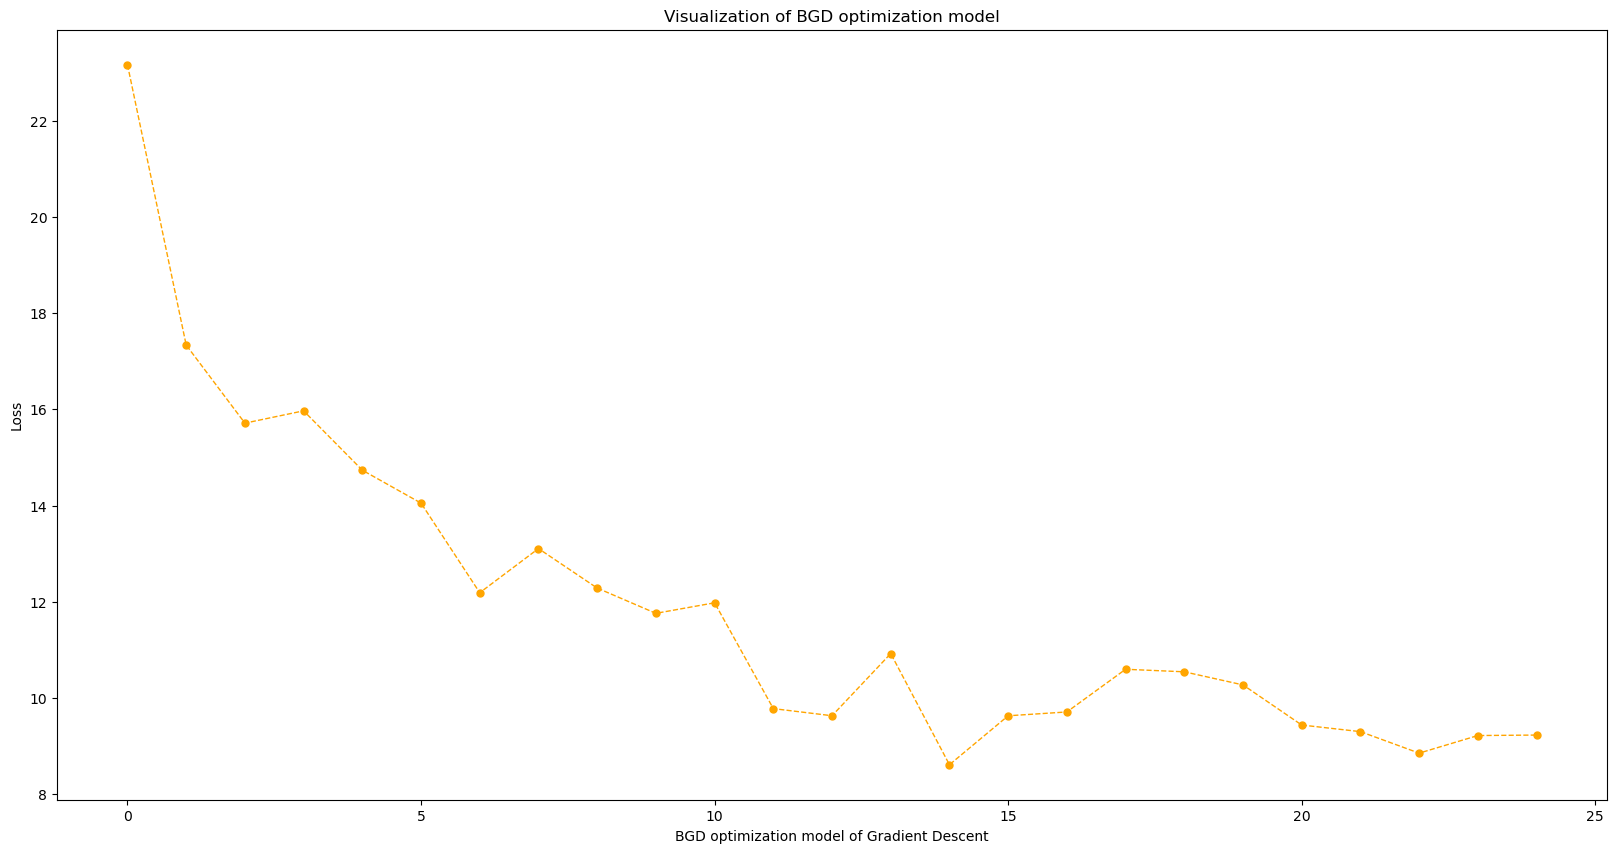

In [40]:
plt.figure(figsize = (20 , 10))
plt.plot(history.history['loss'] ,color='orange', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)   
plt.xlabel('BGD optimization model of Gradient Descent')
plt.ylabel('Loss')
plt.title('Visualization of BGD optimization model')
plt.show()

#### Inisghts : This is less zigzag as compare to MBD and very less zigzag as compare to SGD

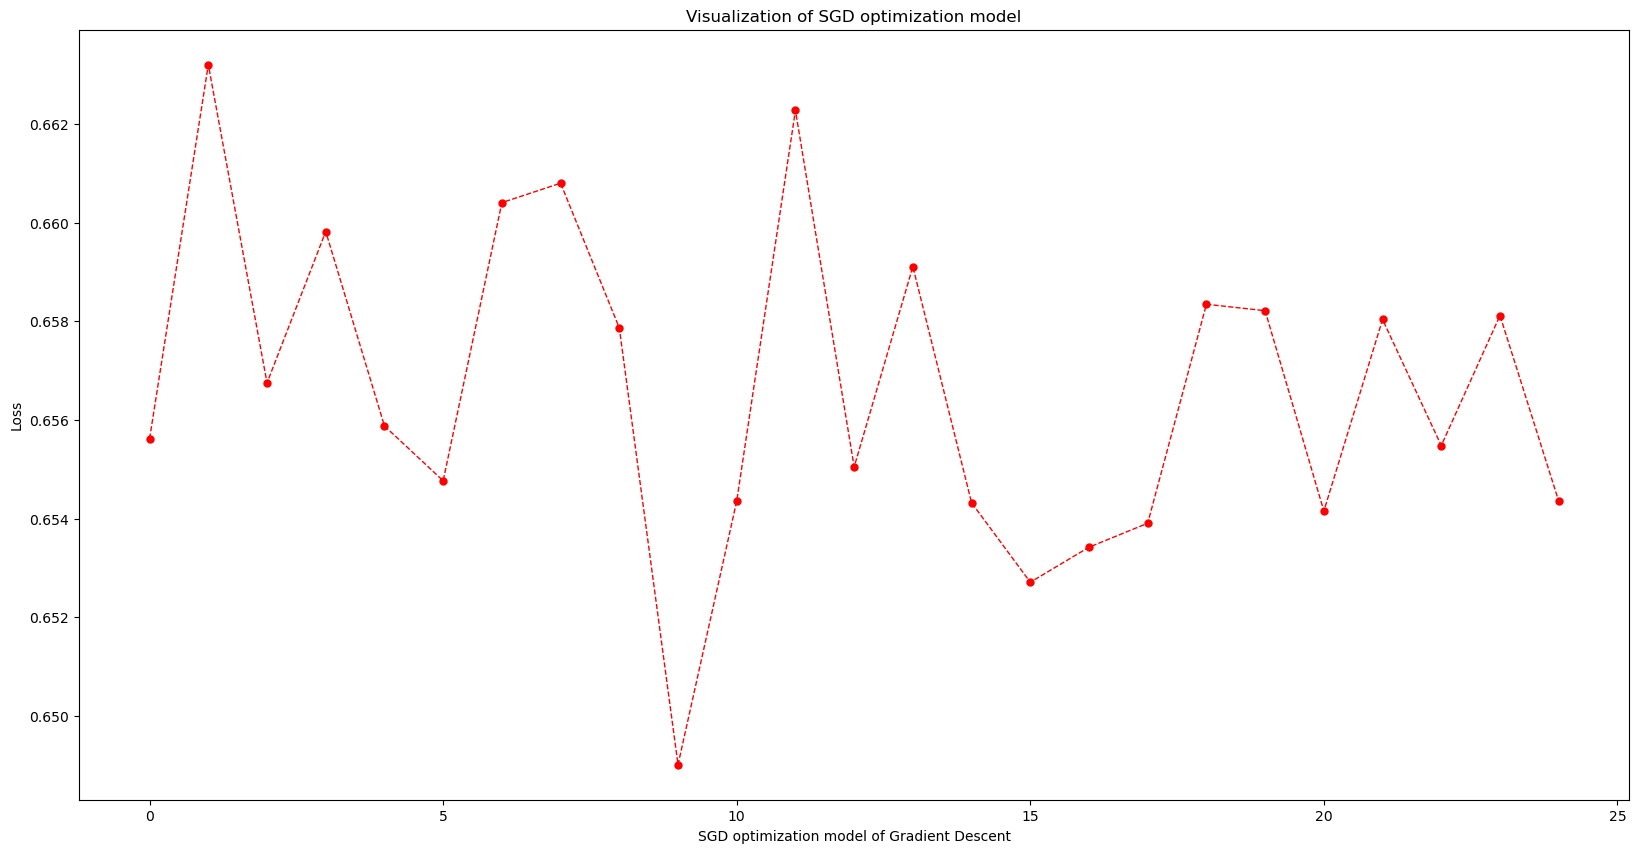

In [41]:
plt.figure(figsize = (20 , 10))
plt.plot(history1.history['loss'] ,color='red', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)   
plt.xlabel('SGD optimization model of Gradient Descent')
plt.ylabel('Loss')
plt.title('Visualization of SGD optimization model')
plt.show()

#### Insights : Data is more zig zag i.e. Its SGD

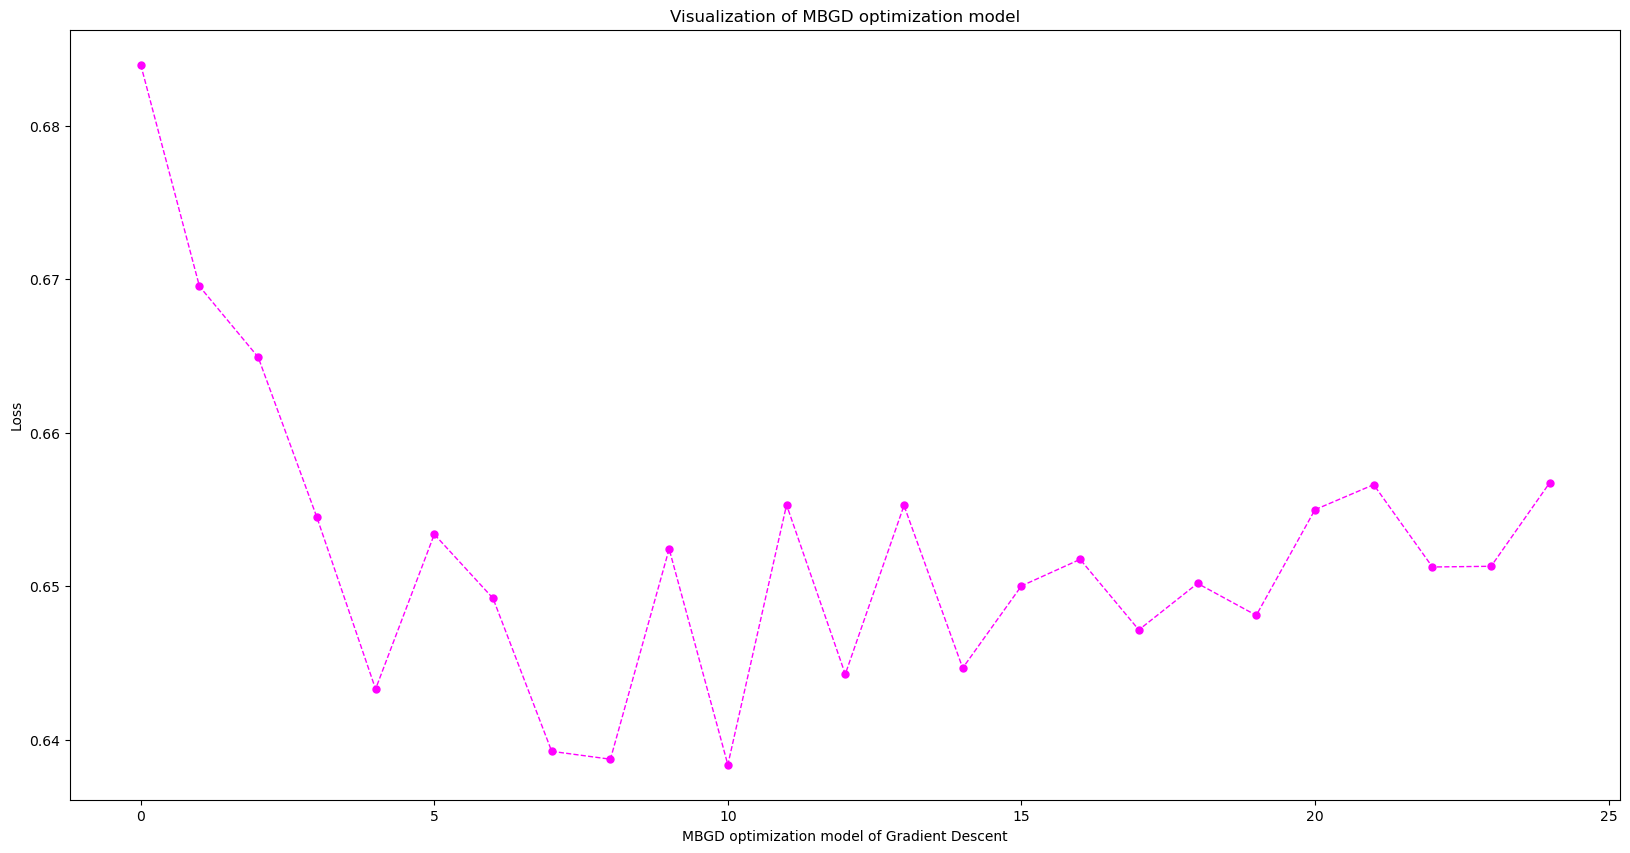

In [42]:
plt.figure(figsize = (20 ,10))
plt.plot(history2.history['loss'] ,color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)   
plt.xlabel('MBGD optimization model of Gradient Descent')
plt.ylabel('Loss')
plt.title('Visualization of MBGD optimization model')
plt.show()

#### Insights : This is less zigzag as compare to SGD and more zigzag than BGD

### Activation Function : 

##### If problem is binary classification then use loss is binary crossentropy
##### If problem is multiclass classification then use loss is categorical crossentropy
##### If problem is contains images then use loss is sparse categorical crossentropy